In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

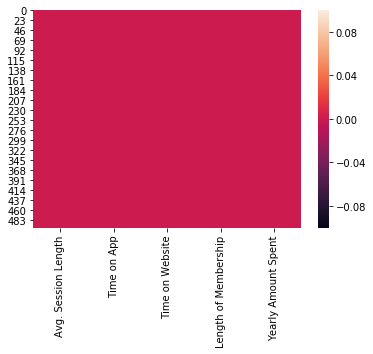

In [14]:
sns.heatmap(df.isnull())
df.isnull().sum()


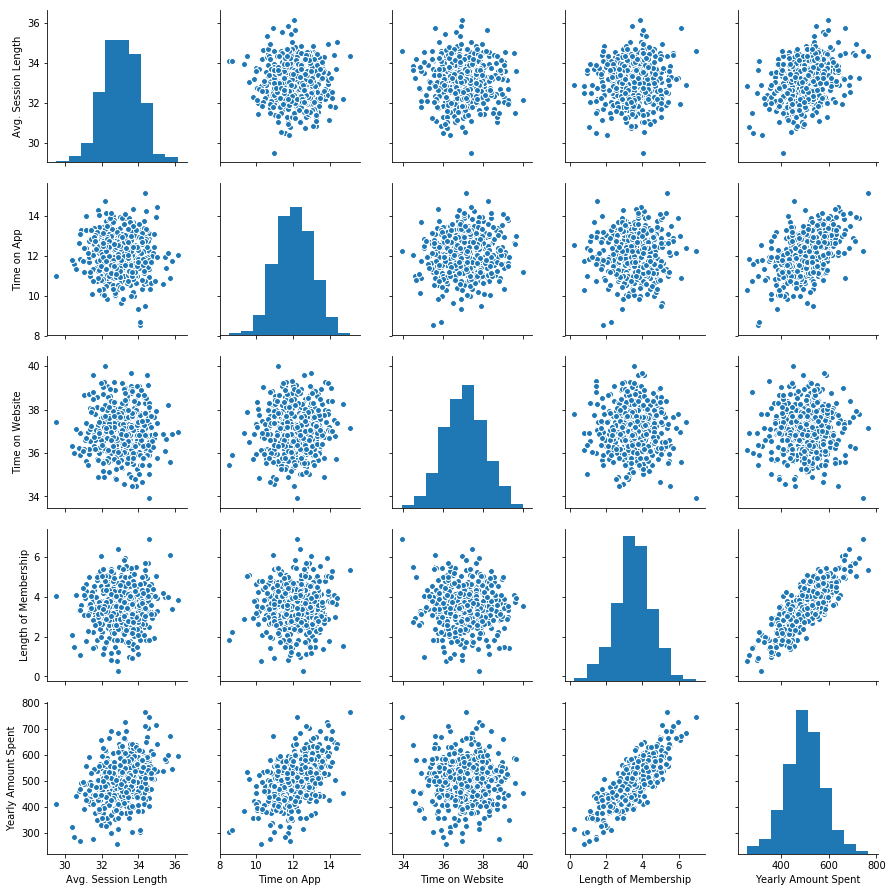

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


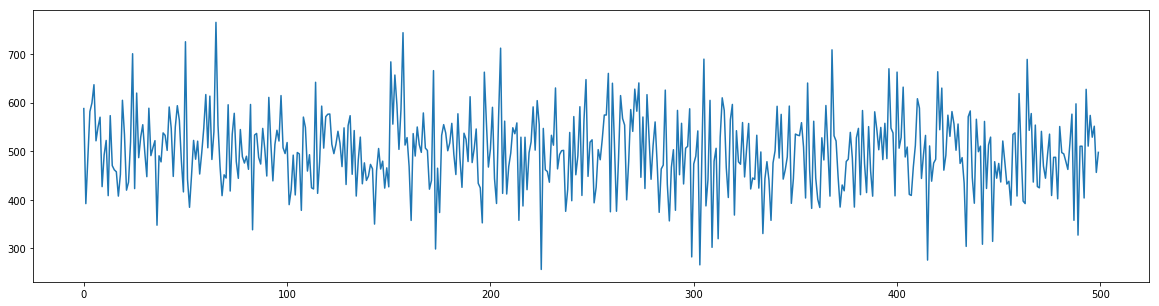

In [7]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(df['Yearly Amount Spent'])

In [8]:
# Drop features that do not relate to yearly amount spent
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [9]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [11]:
# convert the dataframe to array to be easier to use in the forloo
#df_x = df.values
# exclude the dependent variable
df_x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
df_y = df['Yearly Amount Spent']

X_train = np.array(df_x[0:400])
y_train = np.array(df_y[0:400])

X_test = np.array(df_x[400:])
y_test = np.array(df_y[400:])

# Now let's start writing the codes for gradient descent for the linear regression.


In [17]:
# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1, learning_rate, num_iteration] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller

In [20]:
# declare hte variables with some reasonable values
regressors = len(X_train[0]) 
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 500 
N = len(X_train) 


m, b, learning_rate, iteration = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)
print('Learning Rate: ',learning_rate,'Iterations: ',iteration)

intercept:  0.16844652729614185 Slope:  [6.805854449541737, 3.841781081377163, 5.846730774754115, 3.6211762284266222]
Learning Rate:  0.0001 Iterations:  500


# Before going further, let's use the current m and b values to predict the y value and compare with the actual one.

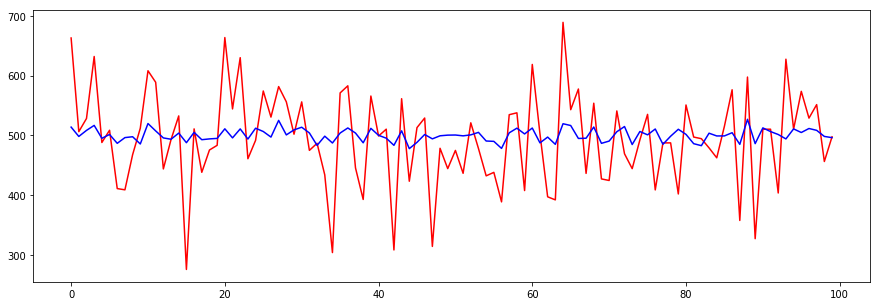

In [21]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')

Text(0.5,1,'Residual plot')

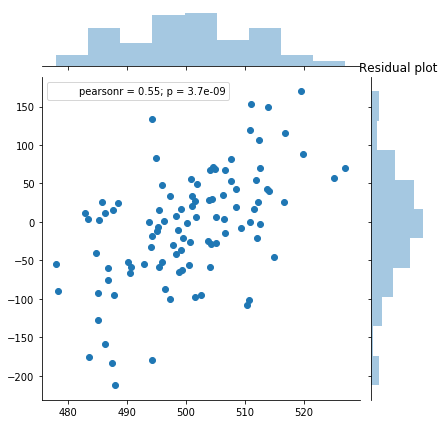

In [22]:
# the predicted values need to be an array to be used in the plot
predicted_values = np.array(predicted_y)

sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [23]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

Learning rate:  0.0001
intercept:  0.16844652729614185
parameters [6.805854449541737, 3.841781081377163, 5.846730774754115, 3.6211762284266222]
R square:  0.14400042628257326
Rmse:  73.53937921450303


# Check under fit or over fit

In [25]:
X_train = np.array(df_x[0:300])
y_train = np.array(df_y[0:300])

cv_X_train = np.array(df_x[300:400])
cv_y_train = np.array(df_y[300:400])


In [26]:
# error for the training set
# increase from 1 training set to k training sets
training_set_error=[]
init_error = 0.0
total_error =0.0
N = len(cv_X_train)
sums=0
sums2=0
sums3=0
# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * X_train[x][y]
    training_set_error.append(0.5 * (m + sums - y_train[x])**2)
    
# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * X_train[j][k]
        init_error += (((m + sums2) - y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    training_set_error.append(total_error)
    init_error = 0.0
    total_error = 0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * X_train[l][ll]
            init_error += (((m + sums3) - y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        training_set_error.append(total_error)
        init_error = 0.0

        
        
# error for the cross validation set
init_error = 0.0
total_error =0.0
cv_training_set_error=[]
N2 = len(cv_X_train)
sums=0
sums2=0
sums3=0

# training = 1
for x in range(1):
    for y in range(regressors):
        sums += b[y] * cv_X_train[x][y]
    cv_training_set_error.append(0.5 * (m + sums - cv_y_train[x])**2)


# start from 2 so the inner for loop will work
for i in range(2, N):
    for j in range(0,i):
        for k in range(regressors):
            sums2 += b[k] * cv_X_train[j][k]
        init_error += (((m + sums2) - cv_y_train[j])**2)
        sums2 = 0
    total_error = (1/(2 * i) * init_error)
    cv_training_set_error.append(total_error)
    init_error = 0.0
    total_error =0.0
    if(i == 99):
        for l in range(N):
            for ll in range(regressors):
                sums3 += b[ll] * cv_X_train[l][ll]
            init_error += (((m + sums3) - cv_y_train[l])**2)
            sums3 = 0
        total_error = (1/(2 * N) * init_error)
        cv_training_set_error.append(total_error)
        init_error = 0.0


In [27]:
training_size = [int (x)for x in range(len(cv_X_train))]

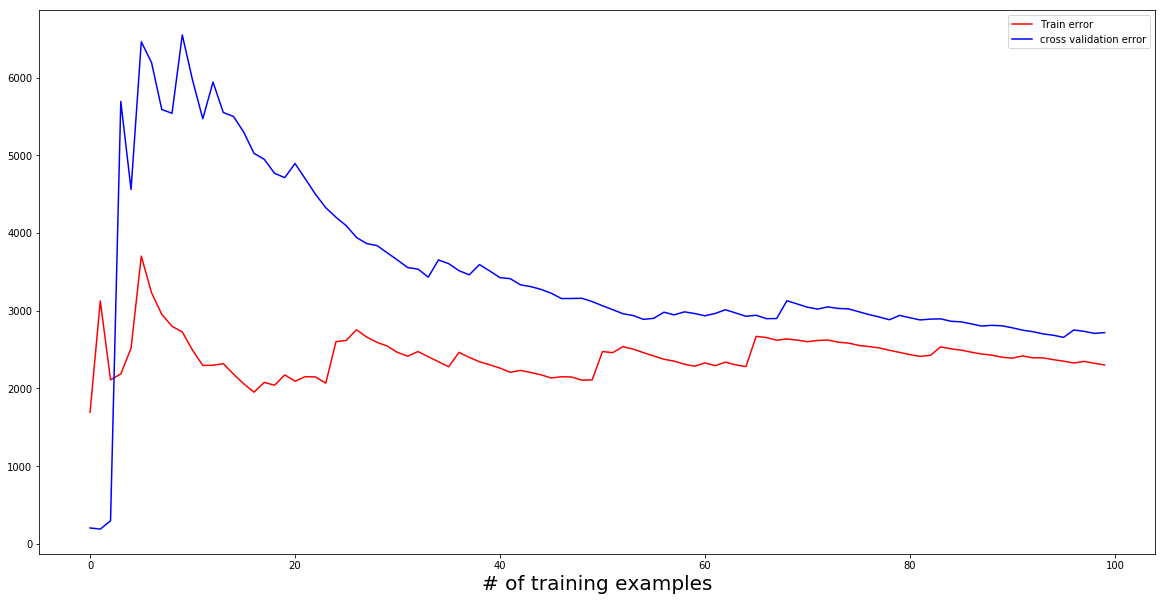

In [28]:
fig,ax = plt.subplots(figsize=(20,10))
a1, = ax.plot(training_size,training_set_error, color='red')
a2, = ax.plot(training_size,cv_training_set_error, color='blue')
plt.xlabel('# of training examples',size=20)
plt.legend([a1,a2],['Train error', 'cross validation error'])

# Let's include the regularization term

In [ ]:
# the arrays were changed to find out if the model is under or over fit. now change it back.

X_train = np.array(df_x[0:400])
y_train = np.array(df_y[0:400])

X_test = np.array(df_x[400:])
y_test = np.array(df_y[400:])

In [29]:
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate, landa):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
    minimized_b = [0 for x in range(regressors)]
    
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)

    for l in range(regressors):
        minimized_b[l] = init_b1[l] * (1 - (learning_rate * landa) / N) - ((learning_rate / N) * minimize_b[l])
        
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration, landa):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate, landa)
    return [init_m1, init_b1, learning_rate, num_iteration, landa] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller

In [40]:
# declare hte variables with some values
regressors = len(X_train[0])
init_m = 0
init_b = [0 for x in range(regressors)]
N = len(X_train)


learning_rate = 0.0001
num_iteration = 500
landa = 100

In [31]:
m, b, learning_rate, num_iteration, landa = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration, landa)
print ("intercept: ",m, "Slope: ",b) 
print ('Learning_rate: ',learning_rate, ' iterations: ', num_iteration, ' Landa: ',landa )

intercept:  0.1765238410085209 Slope:  [6.876748263766681, 3.7994501066241617, 5.888902226859232, 3.6200232422692054]
Learning_rate:  0.0001  iterations:  500  Landa:  100


Text(0.5,1,'Residual plot')

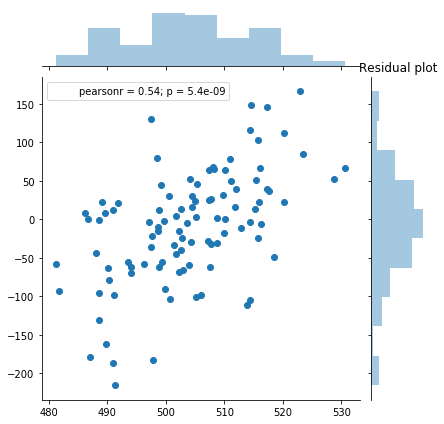

In [32]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0


# the predicted values need to be an array to be used in the plot
predicted_values = np.array(predicted_y)

sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [34]:
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

R square:  0.13522910008661537
Rmse:  73.91519358905403


# Tune the learning rate, number of iteration,  and landa

In [ ]:
Learning rate

In [49]:
learning_rate = [0.0008, 0.00075 ,0.0007,0.00065, 0.0006, 0.0005, 0.0004, 0.0001]
best_r_square = 0
l_rate_d={}

for i in range(len(learning_rate)):
    m, b, l_rate, num_i, lan = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate[i], num_iteration, landa)
   
    sub_sum=0
    predicted_y=[]
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    br = metrics.r2_score(y_test, predicted_y)
    l_rate_d[l_rate]=br
    
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_learning_rate = l_rate


predicted_y = []
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('learning rate and r square:',l_rate_d )
print('Number of iteration:', num_i)
print('best_learning_rate:',best_learning_rate)
print('landa:', landa)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

learning rate and r square: {0.0008: -2.099091562007576e+44, 0.00075: 0.5024922141531271, 0.0007: 0.48205288967360393, 0.00065: 0.46055455276514357, 0.0006: 0.43794030104597437, 0.0005: 0.3891243149080831, 0.0004: 0.3350925241077808, 0.0001: 0.13568699300977916}
Number of iteration: 500
best_learning_rate: 0.00075
landa: 1
intercept:  0.05126722711328831
parameters [9.50255235723015, 11.973614296803955, -0.640669683749689, 19.465189261873327]
R square:  0.5024922141531271
Rmse:  56.06387683830444


Text(0.5,1,'Residual plot')

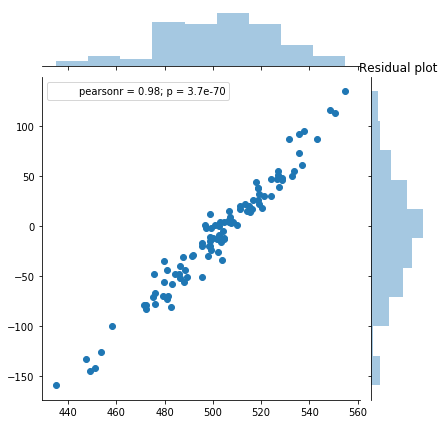

In [36]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [70]:
landa = [1, 10, 100, 1000, 5000]
learning_rate = 0.00075

landa_dic = {}
best_r_square = 0

In [72]:
for i in range(len(landa)):
    m, b, l_rate, num_i, lan = run_minimize_m_b(X_train, y_train, init_m, init_b, learning_rate, num_iteration, landa[i])
   
    predicted_y = []
    sub_sum = 0
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    r_square = metrics.r2_score(y_test, predicted_y)
    landa_dic[lan]=r_square
    
    if( r_square > best_r_square):
        best_r_square = r_square
        best_m = m
        best_b = [ x for x in b]
        best_landa = lan


predicted_y = []
sub_sum = 0
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('landa and r square:',landa_dic )
print('Number of iteration:', num_i)
print('learning_rate:',learning_rate)
print('best_landa:', best_landa)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

landa and r square: {1: 0.5024922141531271, 10: 0.5005919264204095, 100: 0.4820980506707957, 1000: 0.34217475965366073, 5000: 0.15606533559762303}
Number of iteration: 500
learning_rate: 0.00075
best_landa: 1
intercept:  0.05126722711328831
parameters [9.50255235723015, 11.973614296803955, -0.640669683749689, 19.465189261873327]
R square:  0.5024922141531271
Rmse:  56.06387683830444


Text(0.5,1,'residual')

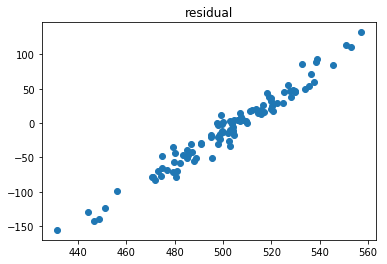

In [73]:
plt.scatter(predicted_values, y_test - predicted_values )
plt.title('residual')

In [75]:
learning_rate = 0.00075
landa = 1
num_iteration = [500, 1000, 2000, 5000, 8000,10000]

iteration_dic = {}

for i in range(len(num_iteration)):
    m, b, l_rate, num_i, lan = run_minimize_m_b(X_train, y_train, init_m, init_b, learning_rate, num_iteration[i], landa)
   
    predicted_y = []
    sub_sum = 0
    for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum += b[j]*X_test[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    r_square = metrics.r2_score(y_test, predicted_y)
    iteration_dic[num_i]=r_square
    
    if( r_square > best_r_square):
        best_r_square = r_square
        best_m = m
        best_b = [ x for x in b]
        best_num_i = num_i


predicted_y = []
sub_sum = 0
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_test[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('iteration and r square:',iteration_dic )
print('Best number of iteration:', best_num_i)
print('learning_rate:',learning_rate)
print('landa:', landa)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values))
print('Rmse: ',np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))

iteration and r square: {500: 0.5024922141531271, 1000: 0.712312108123219, 2000: 0.8596974008953899, 5000: 0.9060400665136984, 8000: 0.9071822599172005, 10000: 0.9072990713270513}
Best number of iteration: 10000
learning_rate: 0.00075
landa: 1
intercept:  -2.6487484329747293
parameters [11.573184723780376, 35.367351280197745, -13.81202385209311, 58.4590654487447]
R square:  0.9072990713270513
Rmse:  24.200549525753747


Text(0.5,1,'residual')

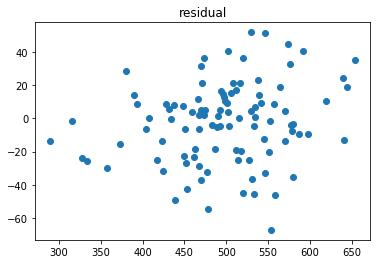

In [76]:
plt.scatter(predicted_values, y_test - predicted_values )
plt.title('residual')

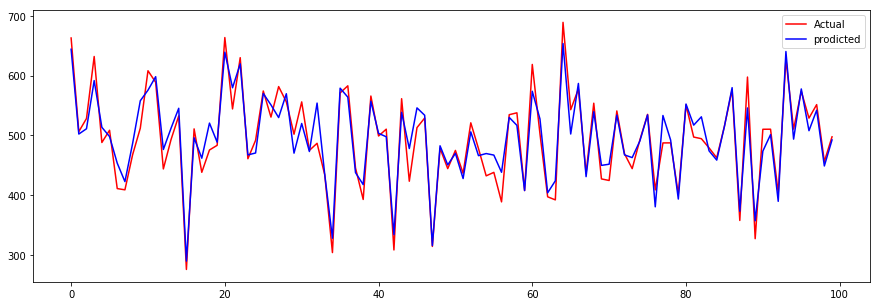

In [77]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')
plt.legend([a1,a2], ["Actual", "prodicted"])